# Black-Scholes Pricing Model

The Black-Scholes equation requires 6 parameters. These are the current price of the underlying asset, strike price of the option, time until expiration of the option,risk-free interest rate, volatility and dividend yield.

#### Call option price $= Se^{-qT}N(d1)- Ke^{-rT}N(d2)$

#### Put option price $= Ke^{-rT}N(-d2) - Se^{-qT}N(-d1)$

#### $d1 = \frac{\ln(\frac{S}{K}) + (r - q + \frac{\sigma^2}{2})T}{\sigma\sqrt{T}}$

#### $d2 = d1 - \sigma\sqrt{T}$

- $S$ = current underlying price
- $K$ = strike price
- $T$ = time to maturity
- $r$ = risk-free interest rate
- $\sigma$ = volatility
- $q$ = dividend yield

In [80]:
# Python imports
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets

In [81]:
# Black Scholes Model price calculation
def get_bsm_price(St, K, r, t, v, q=0, option="both"):
    """Return Black-Scholes-Merton option prices.
    option: 'call', 'put', or 'both'"""
    # handle edge cases: zero time or zero volatility -> intrinsic values
    if t <= 0 or v == 0:
        call = max(0.0, St - K)
        put = max(0.0, K - St)
    else:
        sqrt_t = np.sqrt(t)
        d1 = (np.log(St / K) + (r - q + 0.5 * v**2) * t) / (v * sqrt_t)
        d2 = d1 - v * sqrt_t

        call = norm.cdf(d1) * (St * np.exp(-q * t)) - norm.cdf(d2) * K * np.exp(-r * t)
        put = norm.cdf(-d2) * K * np.exp(-r * t) - norm.cdf(-d1) * (St * np.exp(-q * t))

    if option == 'call':
        return call
    elif option == 'put':
        return put
    else:
        return {"call": call, "put": put}

In [82]:
# Ploting functions
def plot_sns_heatmap(data, title, xtick, ytick, colormap, ax=None):
    # If no axis is provided, create a new figure (smaller size to avoid scrolling)
    if ax is None:
        plt.figure(figsize=(6, 5))
        ax = plt.gca()

    sns.heatmap(
        data,
        annot=True,
        fmt=".2f",
        xticklabels=np.round(xtick, 2),
        yticklabels=np.round(ytick, 2),
        cmap=colormap,
        # center=np.mean(data),
        linewidths=0.5,
        linecolor='white',
        ax=ax
    )
    ax.set_xlabel("Spot price")
    ax.set_ylabel("Volatility")
    ax.set_title(title)

def compute_and_plot(spot_min, spot_max, vol_min, vol_max, K, r, t, q, purchase_price=0):
    
    if spot_min > spot_max:
        spot_min, spot_max = spot_max, spot_min
    if vol_min > vol_max:
        vol_min, vol_max = vol_max, vol_min

    spot_prices = np.linspace(spot_min, spot_max, 11)
    volatilities = np.linspace(vol_min, vol_max, 11)

    call_result = np.zeros((len(volatilities), len(spot_prices)))
    put_result = np.zeros((len(volatilities), len(spot_prices)))

    for i, volatility in enumerate(volatilities):
        for j, spot_price in enumerate(spot_prices):
            result = get_bsm_price(spot_price, K, r, t, volatility, q)
            call_result[i, j] = result['call']
            put_result[i, j] = result['put']

    # Create a figure with 2 subplots side-by-side
    # Increased figsize for bigger heatmaps
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))

    colormap='viridis'

    if purchase_price:
        call_result -= purchase_price
        put_result -= purchase_price
        colormap = 'RdYlGn'
    
    plot_sns_heatmap(call_result, "Call", spot_prices, volatilities, colormap, ax=axes[0])
    plot_sns_heatmap(put_result, "Put", spot_prices, volatilities, colormap, ax=axes[1])
    
    plt.tight_layout()
    plt.show()

## Option Pricing Heatmap

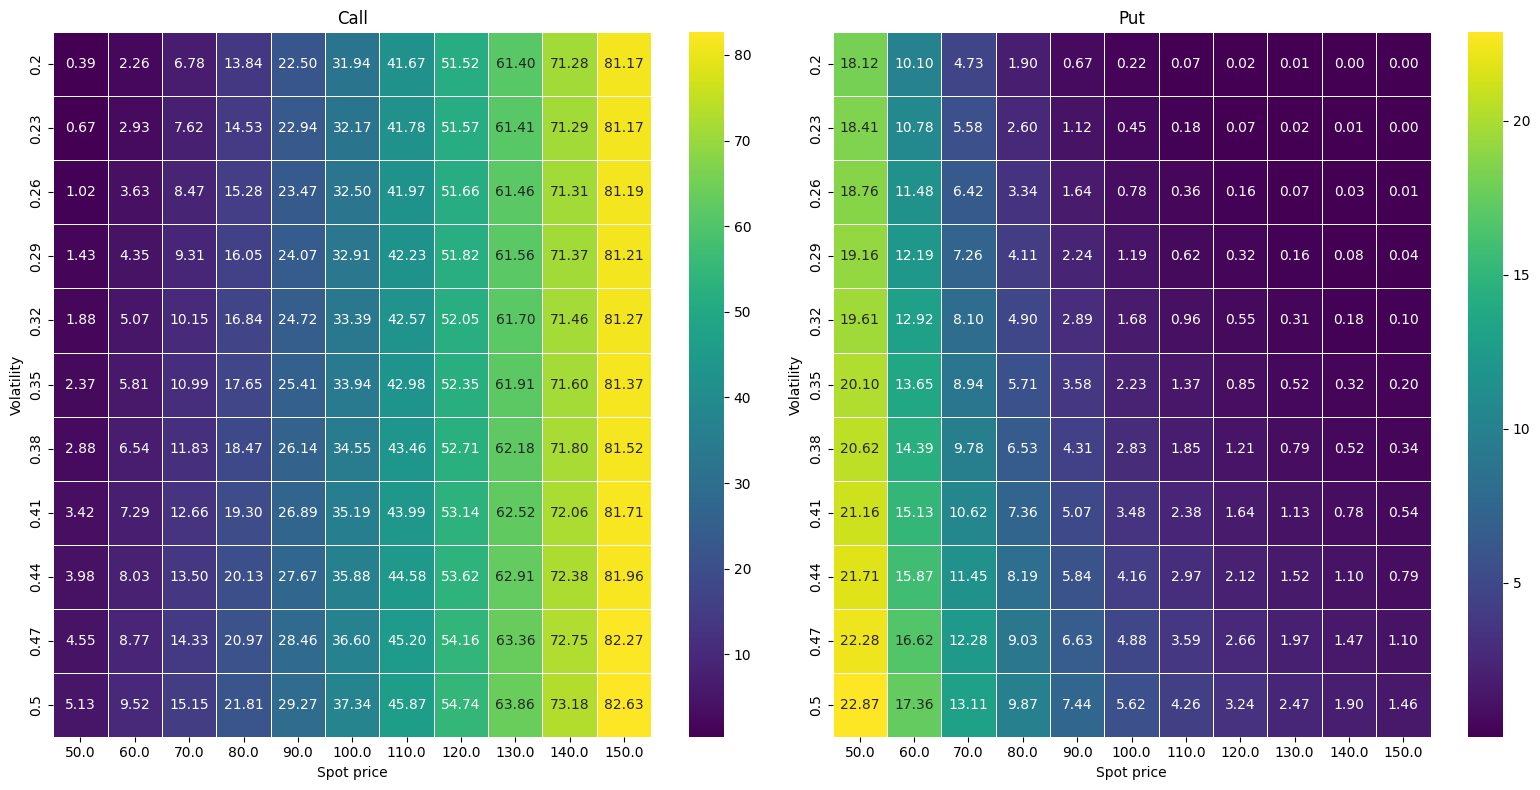

In [ ]:

K_widget = widgets.FloatText(
    value=75, 
    description='Strike price:', 
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)
r_widget = widgets.FloatText(
    value=0.1, 
    description='Risk-free Rate:', 
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)
t_widget = widgets.FloatText(
    value=1.1, 
    description='Time to Maturity:', 
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)
q_widget = widgets.FloatText(
    value=0.01, 
    description='Dividend Yield:', 
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)

vol_range_slider = widgets.FloatRangeSlider(
    value=[0.2, 0.5],
    min=0.01,
    max=1.0,
    step=0.01,
    description='Volatility Range:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)
spot_min_widget = widgets.FloatText(
    value=50, 
    description='Min Spot Price:', 
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)
spot_max_widget = widgets.FloatText(
    value=150, 
    description='Max Spot Price:', 
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)

input_row_1 = widgets.HBox(
    [K_widget, r_widget, t_widget, q_widget],
    layout=widgets.Layout(width='100%', justify_content='space-between')
)
input_row_2 = widgets.HBox(
    [vol_range_slider, spot_min_widget, spot_max_widget],
    layout=widgets.Layout(width='100%', justify_content='flex-end')
)

def update_plot(change=None):
    """Update the plot when any widget value changes"""
    clear_output(wait=True)
    vol_min, vol_max = vol_range_slider.value
    compute_and_plot(
        spot_min_widget.value,
        spot_max_widget.value,
        vol_min,
        vol_max,
        K_widget.value,
        r_widget.value,
        t_widget.value,
        q_widget.value,
    )
    # re-display the widgets after the plot
    display(ui)

K_widget.observe(update_plot, 'value')
r_widget.observe(update_plot, 'value')
t_widget.observe(update_plot, 'value')
q_widget.observe(update_plot, 'value')
vol_range_slider.observe(update_plot, 'value')
spot_min_widget.observe(update_plot, 'value')
spot_max_widget.observe(update_plot, 'value')

ui = widgets.VBox([input_row_1, input_row_2])
display(ui)

# initial plot
update_plot()

## P&L Heatmap

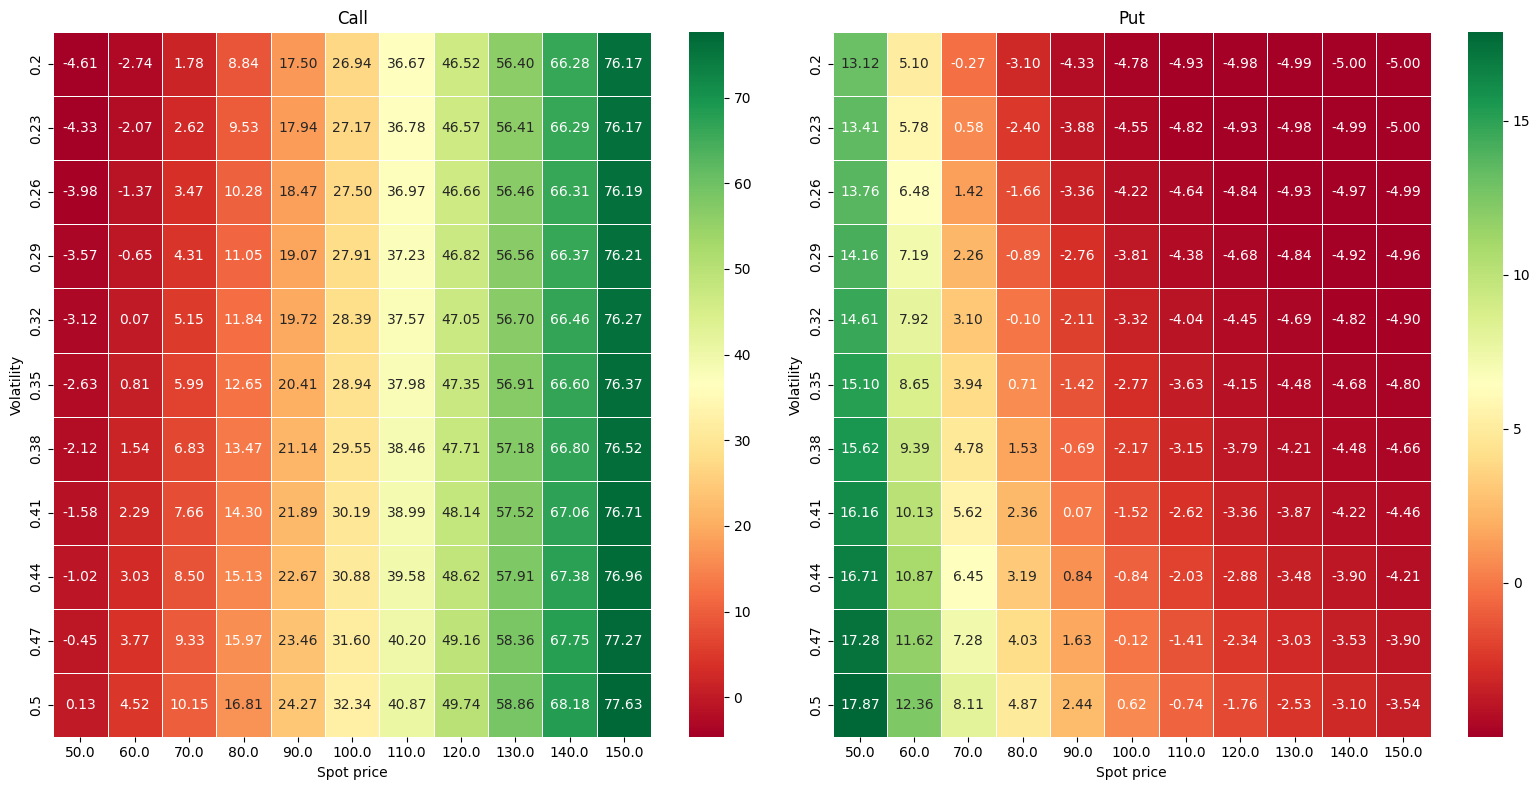

In [85]:

K_widget = widgets.FloatText(
    value=75, 
    description='Strike price:', 
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)
r_widget = widgets.FloatText(
    value=0.1, 
    description='Risk-free Rate:', 
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)
t_widget = widgets.FloatText(
    value=1.1, 
    description='Time to Maturity:', 
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)
q_widget = widgets.FloatText(
    value=0.01, 
    description='Dividend Yield:', 
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)

pprice_widget = widgets.FloatText(
    value=5, 
    description='Purchase Price:', 
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)
vol_range_slider = widgets.FloatRangeSlider(
    value=[0.2, 0.5],
    min=0.01,
    max=1.0,
    step=0.01,
    description='Volatility Range:',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)
spot_min_widget = widgets.FloatText(
    value=50, 
    description='Min Spot Price:', 
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)
spot_max_widget = widgets.FloatText(
    value=150, 
    description='Max Spot Price:', 
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='24%')
)

input_row_1 = widgets.HBox(
    [K_widget, r_widget, t_widget, q_widget],
    layout=widgets.Layout(width='100%', justify_content='space-between')
)
input_row_2 = widgets.HBox(
    [pprice_widget, vol_range_slider, spot_min_widget, spot_max_widget],
    layout=widgets.Layout(width='100%', justify_content='space-between')
)

def update_plot(change=None):
    """Update the plot when any widget value changes"""
    clear_output(wait=True)
    vol_min, vol_max = vol_range_slider.value
    compute_and_plot(
        spot_min_widget.value,
        spot_max_widget.value,
        vol_min,
        vol_max,
        K_widget.value,
        r_widget.value,
        t_widget.value,
        q_widget.value,
        pprice_widget.value
    )
    # re-display the widgets after the plot
    display(ui)

K_widget.observe(update_plot, 'value')
r_widget.observe(update_plot, 'value')
t_widget.observe(update_plot, 'value')
q_widget.observe(update_plot, 'value')
pprice_widget.observe(update_plot, 'value')
vol_range_slider.observe(update_plot, 'value')
spot_min_widget.observe(update_plot, 'value')
spot_max_widget.observe(update_plot, 'value')

ui = widgets.VBox([input_row_1, input_row_2])
display(ui)

update_plot()